Questions:
1. What is raw audio waveform
2. What is log-Mel spectrogram

In [ ]:
!pip install ipykernel 
python -m ipykernel install --user --name=base

# Some utils:

To download the audio from youtube

```bash
!pip install yt-dlp
yt-dlp -x --audio-format mp3 --extractor-args "youtube:player_client=android" https://youtu.be/w40eGwOoJz0
```

Rename audio file:

`mv "YouSeeBIGGIRL ⧸ Apple Seed - Attack on Titan OST [Piano] [w40eGwOoJz0].mp3" attack_on_titan_ost.mp3`

## Env

```bash
uv venv --python 3.12 .venv
uva # alias to activate 'uv source .venv/bin/activate'
uv pip install librosa
uv pip install matplotlib
```

## Transformers

```bash
git clone transformers
```

main folder with transformers data: `/Users/admin/projects/baka/docs/asr/transformers/src/transformers/models/whisper`

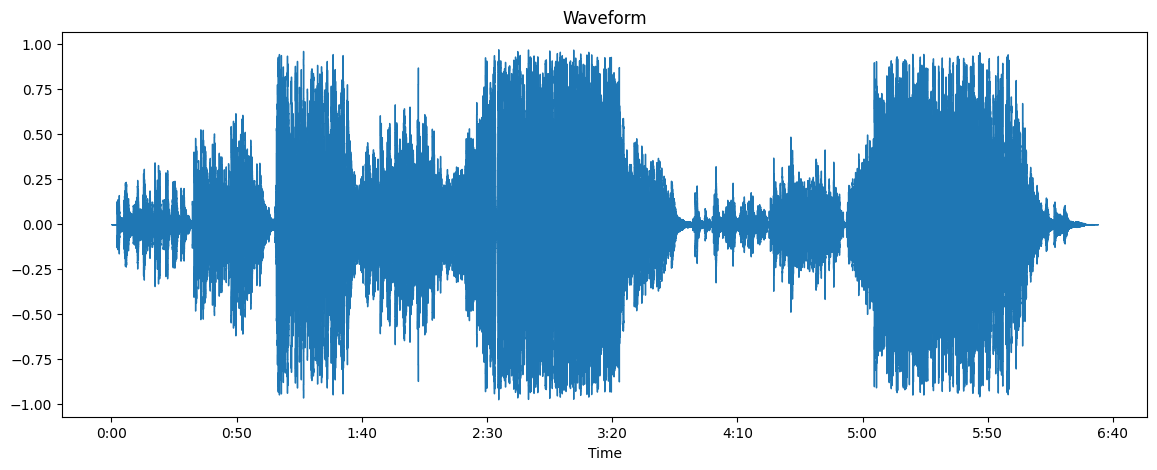

In [2]:
# Now that we have audio let's load it to show what is waveform
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_path = "attack_on_titan_ost.mp3"
y, sr = librosa.load(audio_path)

# Display the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()

# Log-Mel Spectrogram

A **Log-Mel Spectrogram** is a visual representation of audio that is designed to match how humans hear sound.

### 1. The "Spectrogram" Part (Time + Frequency)
While the waveform shows **Amplitude over Time**, a spectrogram shows **Frequency over Time**. It tells you *which* notes are being played at any given moment.

### 2. The "Mel" Part (Pitch Perception)
Humans are better at telling the difference between low sounds (bass) than high sounds (treble). The **Mel Scale** stretches the frequency axis to match this. It gives more space to the lower frequencies that we care about more.

### 3. The "Log" Part (Loudness Perception)
As we discussed, humans hear loudness logarithmically (Decibels). Taking the **Log** of the amplitude converts the raw energy into a scale that makes sense to our ears.

Let's generate one!

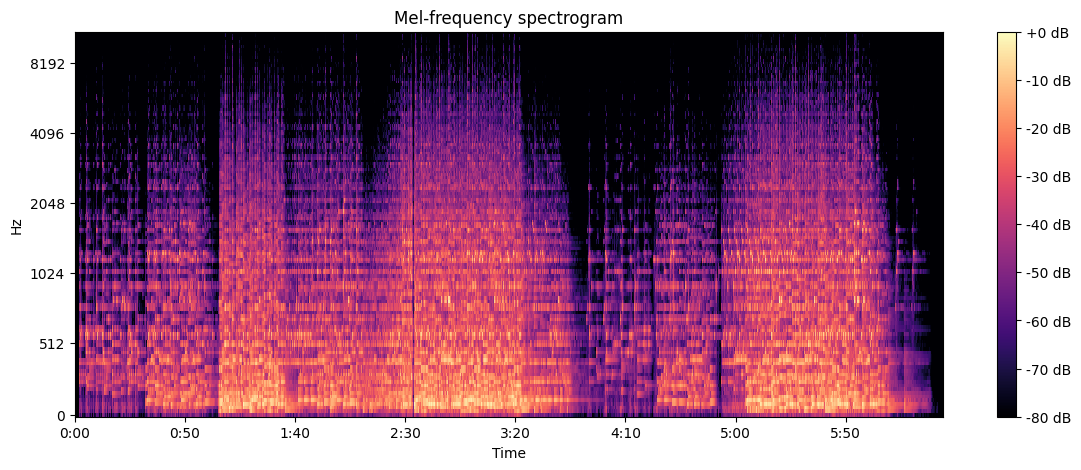

In [3]:
import numpy as np

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to log scale (dB)
log_S = librosa.power_to_db(S, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()